# Proyecto - Análisis Exploratorio
Andrea Cecilia Rivas Castañeda - 16001120

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Análisis Exploratorio de las Variables
* El dataset está compuesto de 26 columnas, de las cuales 14 son numéricas y 12 son categóricas. 
    * 3 de las variables numéricas aparecen como tipo *Object*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

* Se elimino la columna *id* ya que esta no agrega valor al análisis.

In [5]:
data.drop('id', axis=1, inplace=True)

* Separación de variables categóricas y numéricas.

In [6]:
target = ['classification']
special_vars = ['rc', 'pcv', 'wc']
cat_vars = [var for var in data.columns if data[var].dtype == 'O' and (var not in (special_vars+target))]
num_vars = [var for var in data.columns if var not in (cat_vars+special_vars+target)]

In [7]:
cat_vars, num_vars

(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

## Variables Numéricas

In [8]:
num_vars

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

### Variables con Na's
* Descubrimos que todas las variables numéricas contienen valores nulos.

In [9]:
num_vars_with_NA = [var for var in num_vars if data[var].isnull().sum() > 0]
num_vars_with_NA

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
mean_num_vars_with_NA = data[num_vars_with_NA].isnull().mean().sort_values(ascending=False)
mean_num_vars_with_NA

pot     0.2200
sod     0.2175
hemo    0.1300
su      0.1225
sg      0.1175
al      0.1150
bgr     0.1100
bu      0.0475
sc      0.0425
bp      0.0300
age     0.0225
dtype: float64

In [11]:
def text_plot(ax):
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            width = bar.get_width()
            x = bar.get_x()
            y = bar.get_y()
            label_text = height
            label_x = x + width / 2
            label_y = y + height / 2
            ax.text(label_x, label_y, label_text, ha='center',    va='center')

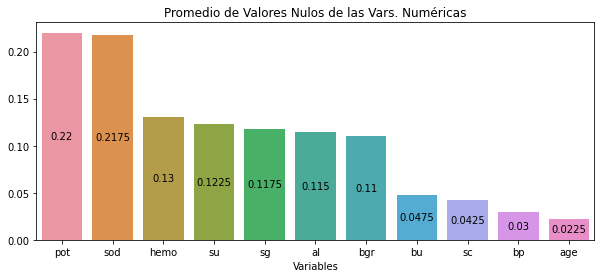

In [12]:
sns.set_palette("Set2")
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=mean_num_vars_with_NA.index, y=mean_num_vars_with_NA.values)
text_plot(ax)
plt.xlabel('Variables')
plt.title('Promedio de Valores Nulos de las Vars. Numéricas')
plt.show()

In [13]:
data.groupby('classification').count().rsub(data.groupby('classification').size(), axis=0)[mean_num_vars_with_NA.index]

,pot,sod,hemo,su,sg,al,bgr,bu,sc,bp,age
classification,,,,,,,,,,,
ckd,83,82,46,44,42,41,38,13,12,10,8
notckd,5,5,6,5,5,5,6,6,5,2,1


Se logra observar que:
* pot: 83 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* sod: 82 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* hemo: 46 de los valores faltates pertenecen a la categría ckd y 6 de los faltantes pertenece a notckd.
* su: 44 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* sg: 42 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* al: 41 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* bgr: 38 de los valores faltates pertenecen a la categría ckd y 6 de los faltantes pertenece a notckd.
* bu: 13 de los valores faltates pertenecen a la categría ckd y 6 de los faltantes pertenece a notckd.
* sc: 12 de los valores faltates pertenecen a la categría ckd y 5 de los faltantes pertenece a notckd.
* bp: 10 de los valores faltates pertenecen a la categría ckd y 2 de los faltantes pertenece a notckd.
* age: 8 de los valores faltates pertenecen a la categría ckd y 1 de los faltantes pertenece a notckd.

* Se realizó la separación entre variables discretas y continuas.

In [14]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['bp', 'sg', 'al', 'su']

In [15]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
cont_vars

['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

## Variables Discretas
* Logramos observar que todas las variables discretas tienen un orden nominal.

In [16]:
for var in discrete_vars:
    print(var, ':', data[var].unique())

bp : [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg : [1.02  1.01  1.005 1.015   nan 1.025]
al : [ 1.  4.  2.  3.  0. nan  5.]
su : [ 0.  3.  4.  1. nan  2.  5.]


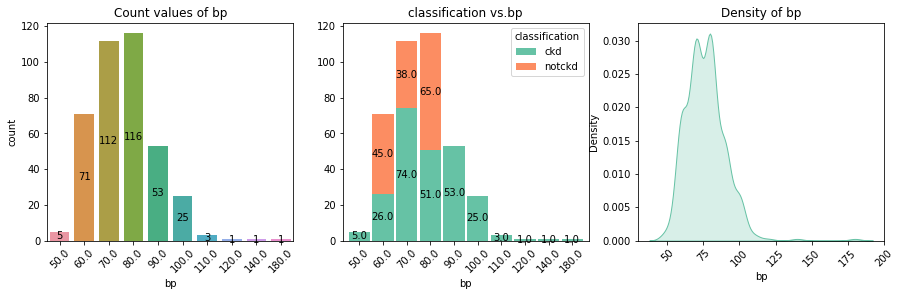

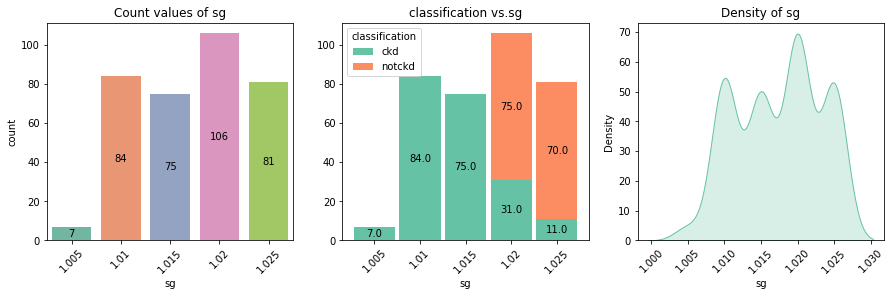

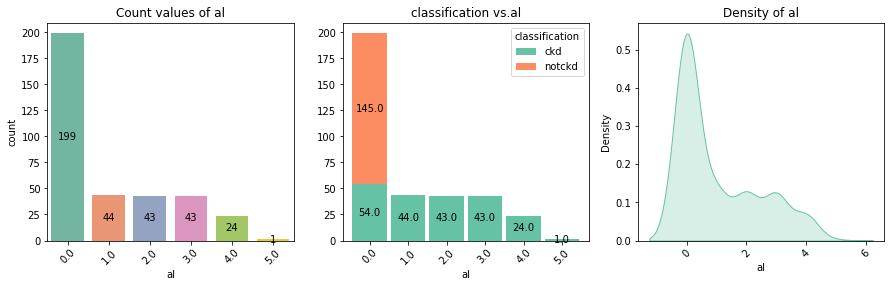

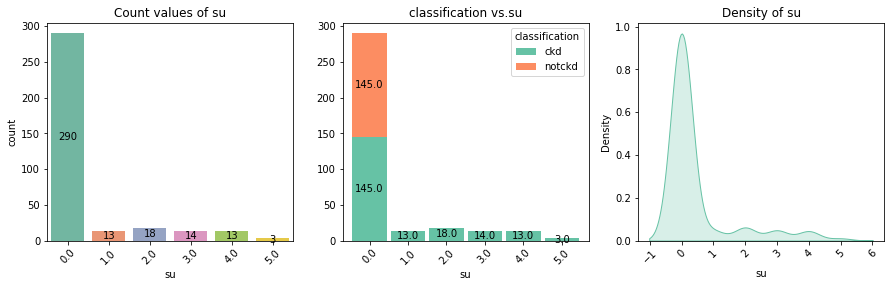

In [17]:
for var in discrete_vars:
    sns.set_palette("Set2")
    fig = plt.figure(figsize=(15,4))
    
    ax = fig.add_subplot(131)
    sns.countplot(x=var, data=data)
    text_plot(ax)
    plt.xticks(rotation=45)
    plt.title('Count values of ' + var)

    ax2 = fig.add_subplot(132)
    df_stack = data.groupby([var, 'classification']).size().reset_index().pivot(columns='classification', index=var, values=0)
    df_stack.plot(kind='bar', stacked=True, width=.9, ax=ax2)
    text_plot(ax2)
    plt.xticks(rotation=45)
    plt.title('classification vs.' + str(var))

    ax3 = fig.add_subplot(133)
    sns.kdeplot(data[var], shade=True)
    plt.xticks(rotation=45)
    plt.title('Density of ' + str(var))

    plt.show()

* Se recomienda transformar las variables *al* y *su* en variables categóricas, cuyas categorías representan si el valor es mayor que el threshold 0.

## Variables Continuas

In [18]:
data[cont_vars].describe()

,age,bgr,bu,sc,sod,pot,hemo
count,391.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


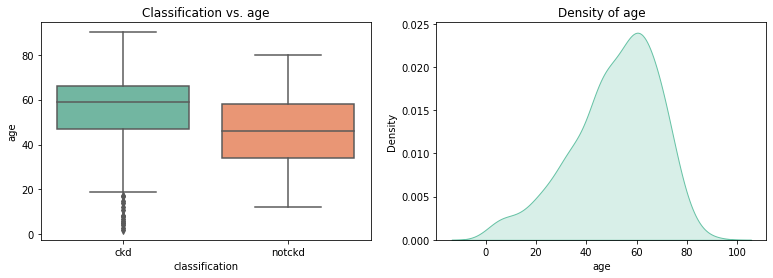

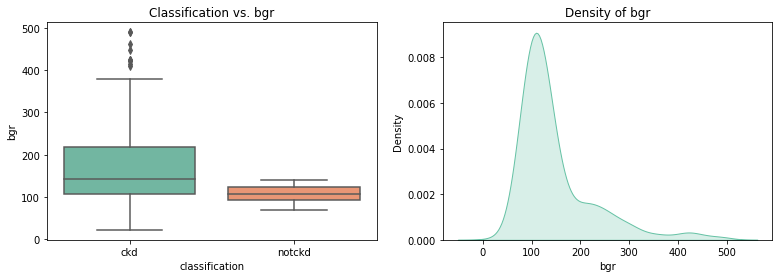

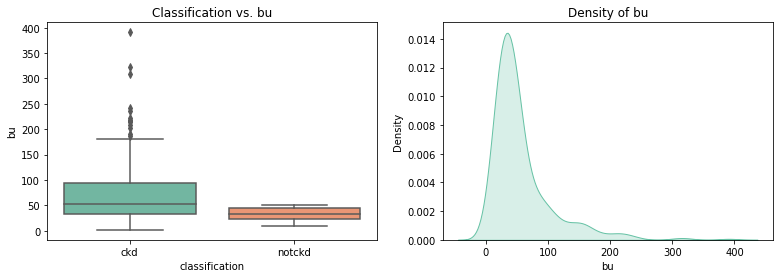

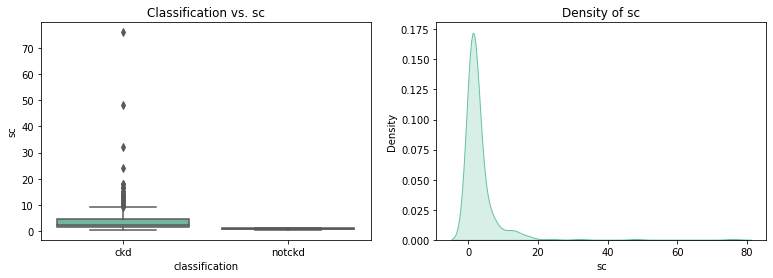

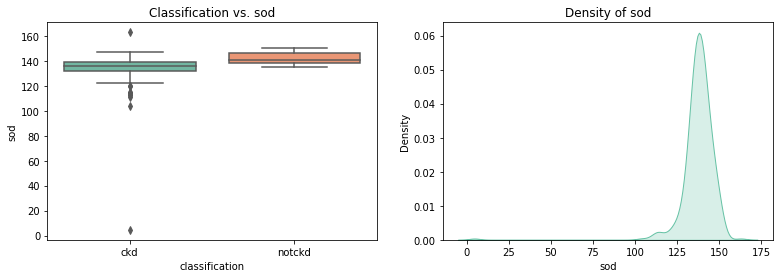

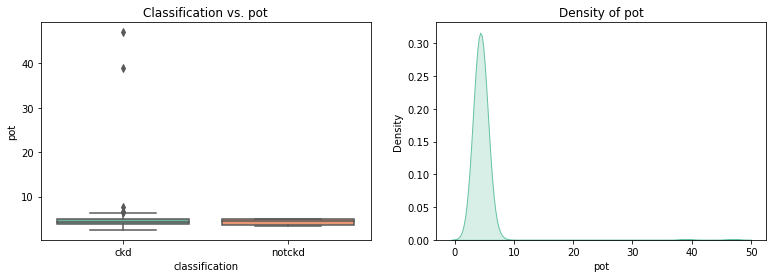

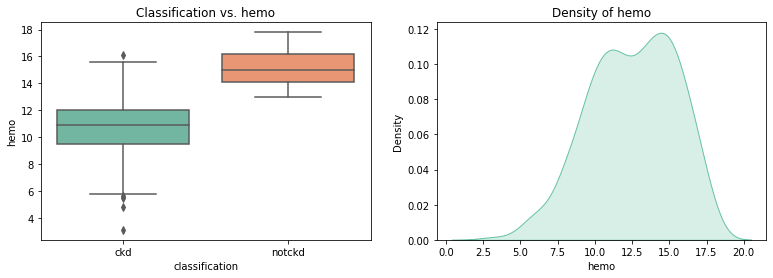

In [19]:
for idx, var in enumerate(cont_vars):
    fig = plt.figure(figsize=(13,4))
    ax = fig.add_subplot(121)
    sns.boxplot(x="classification", y=var, data=data)
    plt.title('Classification vs. '+ var)
    ax2 = fig.add_subplot(122)
    sns.kdeplot(data[var], shade=True)
    plt.title('Density of '+ var)
    plt.show()

* Se recomienda realizar algún tipo de transformación a las variables.

## Variables Categóricas

In [20]:
mean_cat_vars_with_NA = data[cat_vars].isnull().mean().sort_values(ascending=False)
mean_cat_vars_with_NA

rbc      0.3800
pc       0.1625
pcc      0.0100
ba       0.0100
htn      0.0050
dm       0.0050
cad      0.0050
appet    0.0025
pe       0.0025
ane      0.0025
dtype: float64

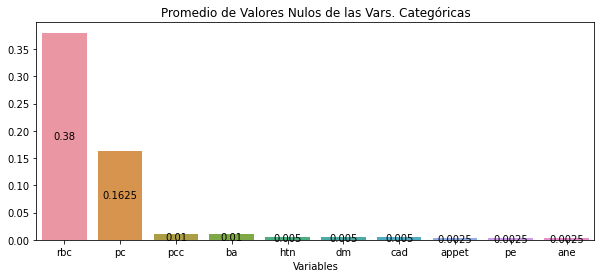

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=mean_cat_vars_with_NA.index, y=mean_cat_vars_with_NA.values)
text_plot(ax)
plt.xlabel('Variables')
plt.title('Promedio de Valores Nulos de las Vars. Categóricas')
plt.show()

In [22]:
unique_vals = data[cat_vars].nunique().sort_values(ascending=False)
unique_vals

dm       5
cad      3
rbc      2
pc       2
pcc      2
ba       2
htn      2
appet    2
pe       2
ane      2
dtype: int64

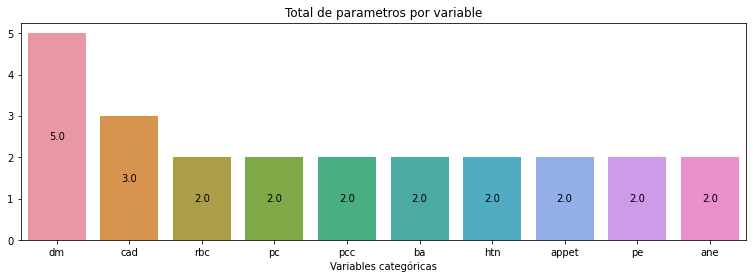

In [23]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
sns.barplot(x=unique_vals.index, y=unique_vals.values)
text_plot(ax)
plt.title('Total de parametros por variable')
plt.xlabel('Variables categóricas')
plt.show()

* Total de valores por parametro de cada variable.

In [24]:
data.groupby('classification').count().rsub(data.groupby('classification').size(), axis=0)[mean_cat_vars_with_NA.index]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,
ckd,143,56,0,0,0,0,0,0,0,0
notckd,9,9,4,4,2,2,2,1,1,1


Se logra observar que:
* rbc: 143 de los valores faltates pertenecen a la categría ckd y 9 de los faltantes pertenece a notckd.
* pc: 56 de los valores faltates pertenecen a la categría ckd y 9 de los faltantes pertenece a notckd.
* pcc: los 4 valores faltantes pertenecen a notckd.
* ba: los 4 valores faltantes pertenecen a notckd.
* htn: los 2 valores faltantes pertenecen a notckd.
* dm: los 2 valores faltantes pertenecen a notckd.
* cad: los 2 valores faltantes pertenecen a notckd.
* appet: el valor faltante pertenece a notckd.
* pe: el valor faltante pertenece a notckd.
* ane: el valor faltante pertenece a notckd.

In [25]:
for var in cat_vars:
    print(var + ':')
    print(data[var].value_counts())
    print()

rbc:
normal      201
abnormal     47
Name: rbc, dtype: int64

pc:
normal      259
abnormal     76
Name: pc, dtype: int64

pcc:
notpresent    354
present        42
Name: pcc, dtype: int64

ba:
notpresent    374
present        22
Name: ba, dtype: int64

htn:
no     251
yes    147
Name: htn, dtype: int64

dm:
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

cad:
no      362
yes      34
\tno      2
Name: cad, dtype: int64

appet:
good    317
poor     82
Name: appet, dtype: int64

pe:
no     323
yes     76
Name: pe, dtype: int64

ane:
no     339
yes     60
Name: ane, dtype: int64



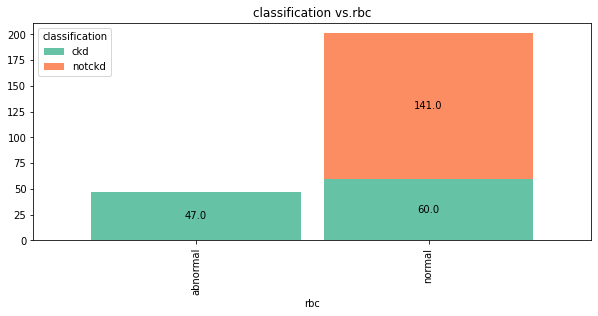

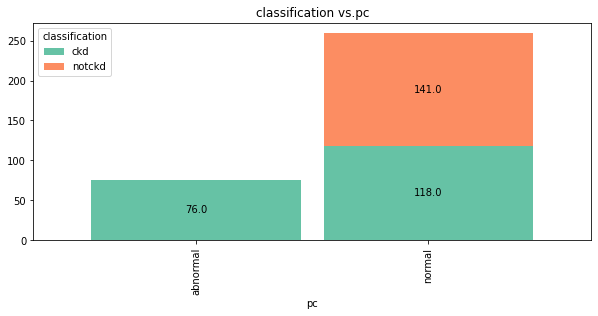

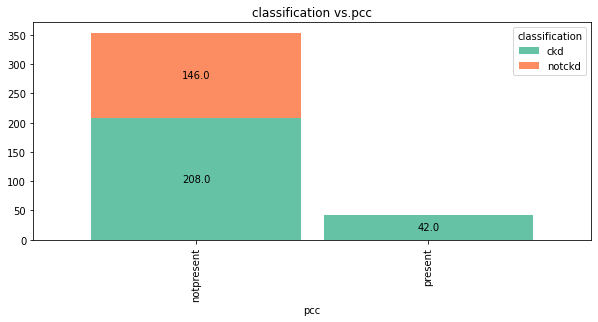

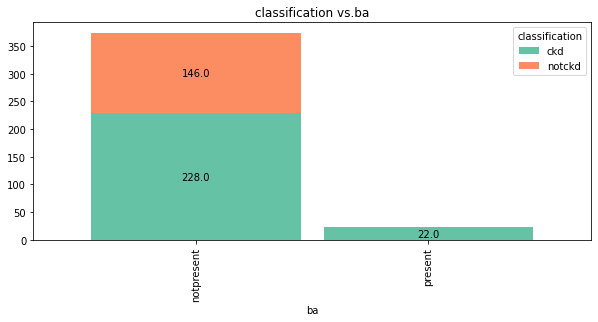

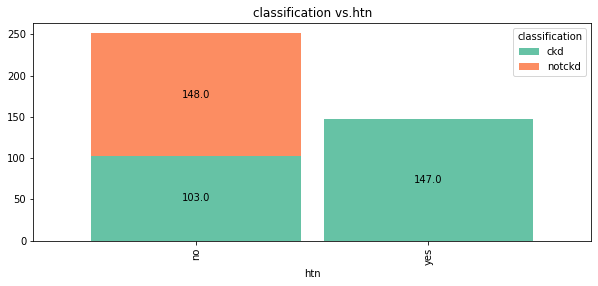

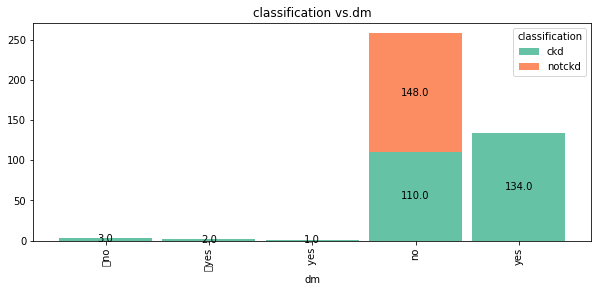

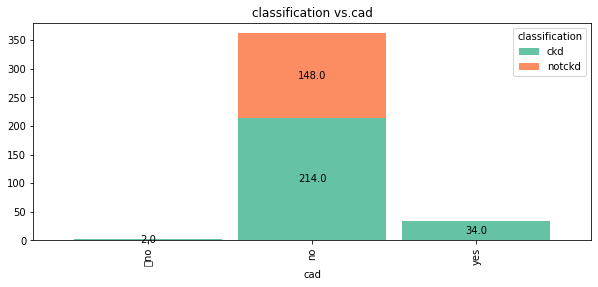

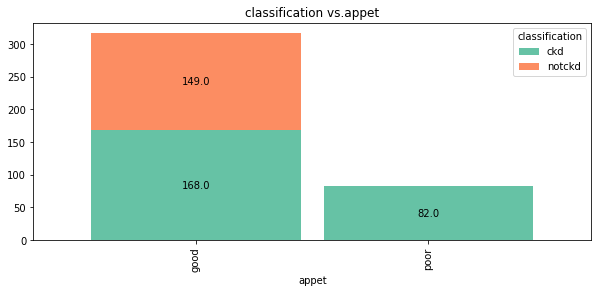

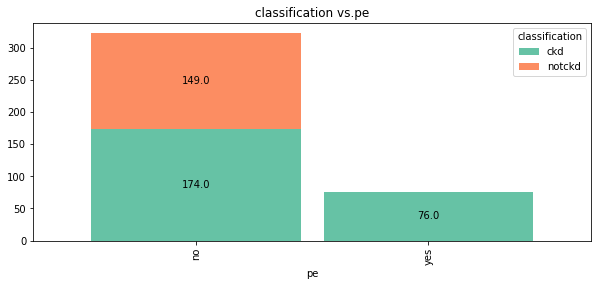

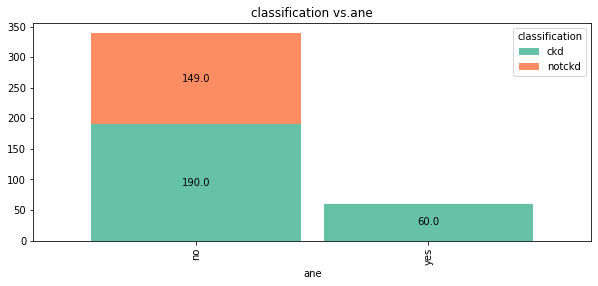

In [26]:
for var in cat_vars:
    df_stack = data.groupby([var, 'classification']).size().reset_index().pivot(columns='classification', index=var, values=0)
    fig, ax = plt.subplots(figsize=(10,4))
    df_stack.plot(kind='bar', stacked=True, width=.9, ax = ax)
    text_plot(ax)
    plt.title('classification vs.' + str(var))

* Se observa que es necesario agrupar las etiquetas que representan el mismo valor para las variables: *cad*, y *dm*.

### Variables con Na's

# Variables Especiales
* Las variables especiales son aquellas que contienen una mezcla entre valores numéricos y texto, pero en realidad son variables numéricas.

In [27]:
special_vars

['rc', 'pcv', 'wc']

In [28]:
for var in special_vars:
    print(var + ':')
    print(data[var].value_counts())
    print()

rc:
5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
5      10
4.6     9
3.4     9
6.1     8
5.5     8
5.9     8
3.7     8
5.8     7
5.4     7
5.3     7
3.8     7
4.3     6
4       6
4.2     6
5.6     6
6.4     5
4.1     5
6.2     5
3.2     5
5.7     5
5.1     5
6.5     5
4.4     5
3.6     4
6.3     4
6       4
3       3
3.3     3
3.5     3
2.7     2
2.1     2
2.6     2
2.9     2
2.8     2
3.1     2
2.5     2
8       1
2.4     1
2.3     1
\t?     1
Name: rc, dtype: int64

pcv:
52      21
41      21
44      19
48      19
40      16
43      14
42      13
45      13
33      12
50      12
32      12
28      12
36      12
34      11
37      11
35       9
46       9
29       9
30       9
31       8
39       7
24       7
26       6
38       5
49       4
47       4
54       4
51       4
53       4
25       3
27       3
22       3
19       2
23       2
16       1
14       1
18       1
\t?      1
15       1
20       1
9        1
21       1
17       1
\t43     1
Name: pcv, dtype: int64

* Se logra observar que las 3 variables contienen el valor *\t?*, por lo que se asumirá como valor nulo.

# Variable Target

In [29]:
target

['classification']

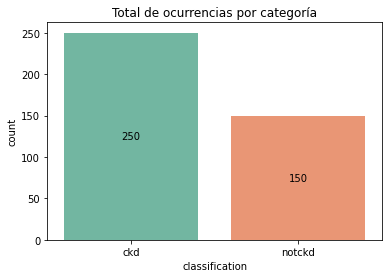

In [28]:
ax = sns.countplot(x="classification", data=data)
plt.title('Total de ocurrencias por categoría')
text_plot(ax)
plt.show()